### ESG

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('company_esg_financial_dataset.csv')
df

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.4,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.9,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.8,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3


In [3]:
df.columns

Index(['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue',
       'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
       'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions',
       'WaterUsage', 'EnergyConsumption'],
      dtype='object')

In [4]:
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [6]:
df.shape

(11000, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [8]:
print("\nColumn Names and Types:")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes)):
    print(f"{i+1:2d}. {col:<25} : {dtype}")


Column Names and Types:
 1. CompanyID                 : int64
 2. CompanyName               : object
 3. Industry                  : object
 4. Region                    : object
 5. Year                      : int64
 6. Revenue                   : float64
 7. ProfitMargin              : float64
 8. MarketCap                 : float64
 9. GrowthRate                : float64
10. ESG_Overall               : float64
11. ESG_Environmental         : float64
12. ESG_Social                : float64
13. ESG_Governance            : float64
14. CarbonEmissions           : float64
15. WaterUsage                : float64
16. EnergyConsumption         : float64


In [9]:
missing_data = df.isnull().sum()
missing_percent = 100 * missing_data / len(df)
    
missing_df = pd.DataFrame({
        'Column': missing_data.index,
        'Missing_Count': missing_data.values,
        'Missing_Percentage': missing_percent.values
    }).sort_values('Missing_Count', ascending=False)
    
print(missing_df)

               Column  Missing_Count  Missing_Percentage
8          GrowthRate           1000            9.090909
0           CompanyID              0            0.000000
1         CompanyName              0            0.000000
2            Industry              0            0.000000
3              Region              0            0.000000
4                Year              0            0.000000
5             Revenue              0            0.000000
6        ProfitMargin              0            0.000000
7           MarketCap              0            0.000000
9         ESG_Overall              0            0.000000
10  ESG_Environmental              0            0.000000
11         ESG_Social              0            0.000000
12     ESG_Governance              0            0.000000
13    CarbonEmissions              0            0.000000
14         WaterUsage              0            0.000000
15  EnergyConsumption              0            0.000000


In [12]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
    
if numerical_cols:
    print("\nNumerical Statistics:")
    print(df[numerical_cols].describe().round(2))
    
if categorical_cols:
    print("\nCategorical Statistics:")
    for col in categorical_cols:
        print(f"\n{col.upper()}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Top 5 values:")
        print(df[col].value_counts().head())

Numerical columns (13): ['CompanyID', 'Year', 'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']
Categorical columns (3): ['CompanyName', 'Industry', 'Region']

Numerical Statistics:
       CompanyID      Year    Revenue  ProfitMargin  MarketCap  GrowthRate  ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  CarbonEmissions   WaterUsage  EnergyConsumption
count   11000.00  11000.00   11000.00      11000.00   11000.00    10000.00     11000.00           11000.00    11000.00        11000.00     1.100000e+04     11000.00       1.100000e+04
mean      500.50   2020.00    4670.85         10.90   13380.62        4.83        54.62              56.42       55.66           51.77     1.271462e+06    560044.15       1.165839e+07
std       288.69      3.16    9969.95          8.76   39922.87        9.42        15.89              26.77       23.36           25.32     5

FINANCIAL CHARACTERISTICS:
- Revenue ranges from $35.9M to $180.8B, with a median of $1.9B
- Profit margins vary widely (-20% to 50%), with an average of 10.9%
- Market capitalizations span from $1.8M to $865.3B
- Growth rates show high volatility (-36% to 38%), averaging 4.8%

ESG PERFORMANCE:
- ESG scores are on a 0-100 scale across all three pillars
- Environmental scores show the highest variation (0-100, std: 26.77)
- Social scores are relatively stable (mean: 55.66, std: 23.36)
- Governance scores tend to be lower on average (mean: 51.77)

ENVIRONMENTAL IMPACT:
- Carbon emissions vary dramatically (2,042 to 174M tons), indicating companies of vastly different scales
- Water usage ranges from 1,021 to 52M units
- Energy consumption shows similar extreme variation (5,105 to 1.7B units)

GEOGRAPHIC DISTRIBUTION:
- Asia-Pacific dominates (4,433 companies, 40.3%)
- Relatively balanced representation across other regions
- Middle East has the smallest representation (1,617 companies)

INDUSTRY COVERAGE:
- 20 different industries represented
- Technology leads with 580 companies
- Healthcare, Financial Services, and Energy are also well-represented

In [13]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
    
if duplicates > 0:
    print("Sample duplicate rows:")
    print(df[df.duplicated()].head())
        
    response = input("\nWould you like to remove duplicates? (y/n): ")
    if response.lower() == 'y':
        df = df.drop_duplicates()
        print(f"Removed {duplicates} duplicate rows")

Number of duplicate rows: 0


In [14]:
df['GrowthRate'].fillna(df['GrowthRate'].mean(), inplace=True)

In [15]:
missing_data = df.isnull().sum()
missing_data

CompanyID            0
CompanyName          0
Industry             0
Region               0
Year                 0
Revenue              0
ProfitMargin         0
MarketCap            0
GrowthRate           0
ESG_Overall          0
ESG_Environmental    0
ESG_Social           0
ESG_Governance       0
CarbonEmissions      0
WaterUsage           0
EnergyConsumption    0
dtype: int64

Analyzing distributions for: ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']


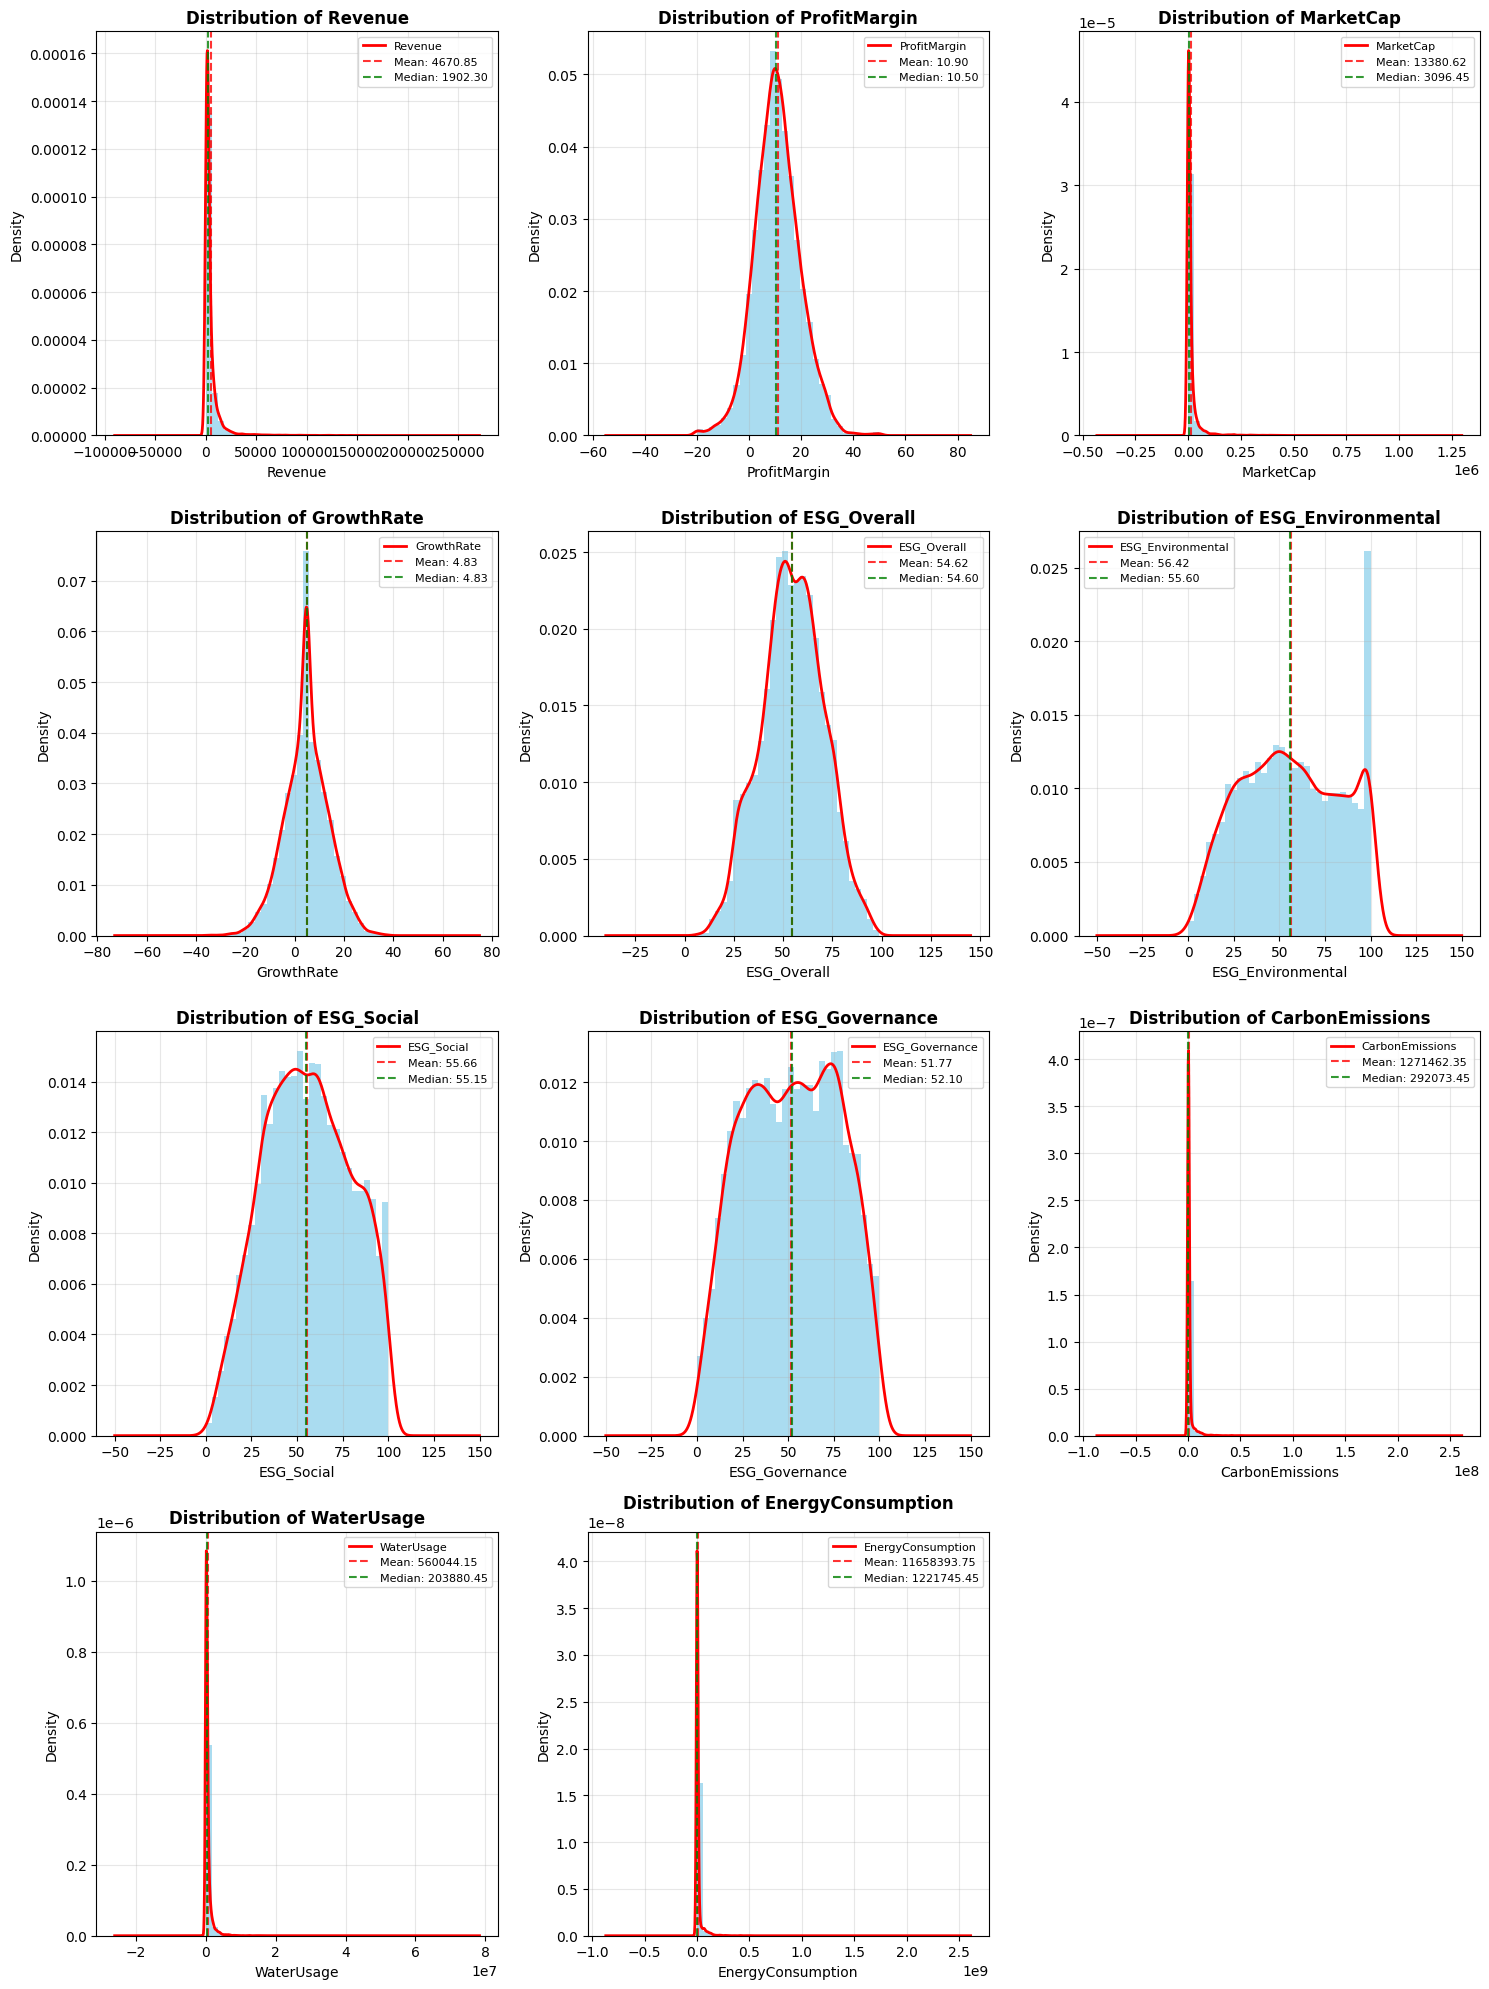

In [17]:
key_cols = ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 
               'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
               'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']
    
existing_cols = [col for col in key_cols if col in df.columns]
print(f"Analyzing distributions for: {existing_cols}")
    
if not existing_cols:
    print("No key columns found for distribution analysis.")
    
n_cols = 3
n_rows = (len(existing_cols) + n_cols - 1) // n_cols
    
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1) if n_cols > 1 else [axes]
axes = axes.flatten()
    
for i, col in enumerate(existing_cols):
    if i < len(axes):
        data_clean = df[col].dropna()
            
        if len(data_clean) > 0:
            axes[i].hist(data_clean, bins=30, alpha=0.7, density=True, color='skyblue')
                
            if len(data_clean) > 1:
                data_clean.plot(kind='kde', ax=axes[i], color='red', linewidth=2)
                
            axes[i].set_title(f'Distribution of {col}', fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Density')
                
            mean_val = data_clean.mean()
            median_val = data_clean.median()
            axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, 
                            label=f'Mean: {mean_val:.2f}')
            axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.8, 
                               label=f'Median: {median_val:.2f}')
            axes[i].legend(fontsize=8)
            axes[i].grid(True, alpha=0.3)
    
for i in range(len(existing_cols), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

REVENUE DISTRIBUTION:
- Extremely right-skewed with most companies clustered near zero
- A few mega-corporations create the long tail extending to $180B+

PROFIT MARGIN:
- Normal distribution centered around 10.9%
- Symmetrical spread from -20% to +50%
- Shows healthy variation in operational efficiency across companies

MARKET CAP:
- Highly concentrated near zero with extreme right skew
- Similar pattern to revenue - dominated by smaller companies with a few massive outliers
- The log scale reveals the enormous range in company valuations

GROWTH RATE:
- Nearly perfect normal distribution around 4.8%
- Symmetric tails extending to both high growth (+38%) and contraction (-36%)
- Suggests the dataset captures companies across different lifecycle stages

ESG OVERALL:
- Normal distribution centered at 54.6 - indicating room for improvement industry-wide
- The bell curve suggests ESG performance follows natural variation patterns

ESG ENVIRONMENTAL SCORES:
- Bimodal distribution. Two distinct peaks around 35 and 75
- This suggests companies fall into either "low ESG adopters" or "high ESG performers"
- Very few companies in the middle range (40-60)

SOCIAL AND GOVERNANCE ESG:
- Both show more normal distributions
- Social scores are slightly higher on average than governance
- Governance shows the lowest average scores among ESG pillars

CARBON EMISSIONS, WATER USAGE & ENERGY CONSUMPTION:
- All three show extreme right skew with massive concentration near zero
- This reflects the reality that a small number of heavy industrial companies dominate environmental impact
- The log scales are necessary to visualize the data due to the enormous range

In [18]:
key_cols = ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 
               'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
               'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']
    
existing_cols = [col for col in key_cols if col in df.columns]
outlier_summary = []
    
for col in existing_cols:
    data_clean = df[col].dropna()
    if len(data_clean) > 0:
        Q1 = data_clean.quantile(0.25)
        Q3 = data_clean.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
            
        outliers = data_clean[(data_clean < lower_bound) | (data_clean > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(data_clean)) * 100
            
        outlier_summary.append({
                'Column': col,
                'Total_Values': len(data_clean),
                'Outlier_Count': outlier_count,
                'Outlier_Percentage': round(outlier_percentage, 2),
                'Lower_Bound': round(lower_bound, 2),
                'Upper_Bound': round(upper_bound, 2)})
    
outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.sort_values('Outlier_Percentage', ascending=False))

               Column  Total_Values  Outlier_Count  Outlier_Percentage  Lower_Bound  Upper_Bound
10  EnergyConsumption         11000           1430               13.00  -7657364.78  13580717.62
2           MarketCap         11000           1354               12.31    -12246.94     23340.96
8     CarbonEmissions         11000           1289               11.72   -803964.31   1667548.39
0             Revenue         11000           1202               10.93     -4167.00      9448.40
9          WaterUsage         11000           1129               10.26   -625570.27   1215642.92
3          GrowthRate         11000            216                1.96       -16.95        26.65
1        ProfitMargin         11000            196                1.78       -11.20        32.80
4         ESG_Overall         11000             13                0.12        11.85        97.85
5   ESG_Environmental         11000              0                0.00       -31.75       145.45
6          ESG_Social         

ENERGY CONSUMPTION (13% outliers):
- Highest outlier rate indicates extreme variation in energy usage
- Likely reflects industrial giants vs. service companies
- The negative lower bound suggests some data quality issues or the IQR method struggling with extreme skewness

MARKET CAP(12.31% outliers):
- High outlier rate expected given the presence of mega-corporations
- Upper bound of $23.3B means companies above this are considered "outliers"
- This actually captures legitimate business reality - some companies are genuinely massive

CARBON EMISSIONS (11.72% outliers):
- Heavy industrial companies create natural outliers
- Environmental impact varies dramatically by industry sector

REVENUE (10.93% outliers):
- Similar pattern to Market Cap
- Upper bound of $9.4B shows the threshold where companies become "statistical outliers"

WATER USAGE (10.26% outliers):
- Just above the 10% threshold
- Reflects industrial vs. service sector differences
- Negative lower bound again suggests IQR method limitations with skewed data

GROWTH RATE & PROFIT MARGIN (almost 2% outliers):
- Very reasonable outlier rates
- These metrics show more normal distributions
- Outliers here likely represent genuinely exceptional performance (very high growth) or distress (major losses)

ESG SCORES (0-0.12% outliers):
- Virtually no outliers detected
- This is expected since ESG scores are typically bounded (0-100 scale)
- Shows these metrics are well-controlled and normalized

Number of unique industries: 9

Top 10 Industries:
Industry
Healthcare        1331
Transportation    1287
Manufacturing     1287
Consumer Goods    1276
Finance           1243
Energy            1188
Utilities         1177
Retail            1166
Technology        1045
Name: count, dtype: int64


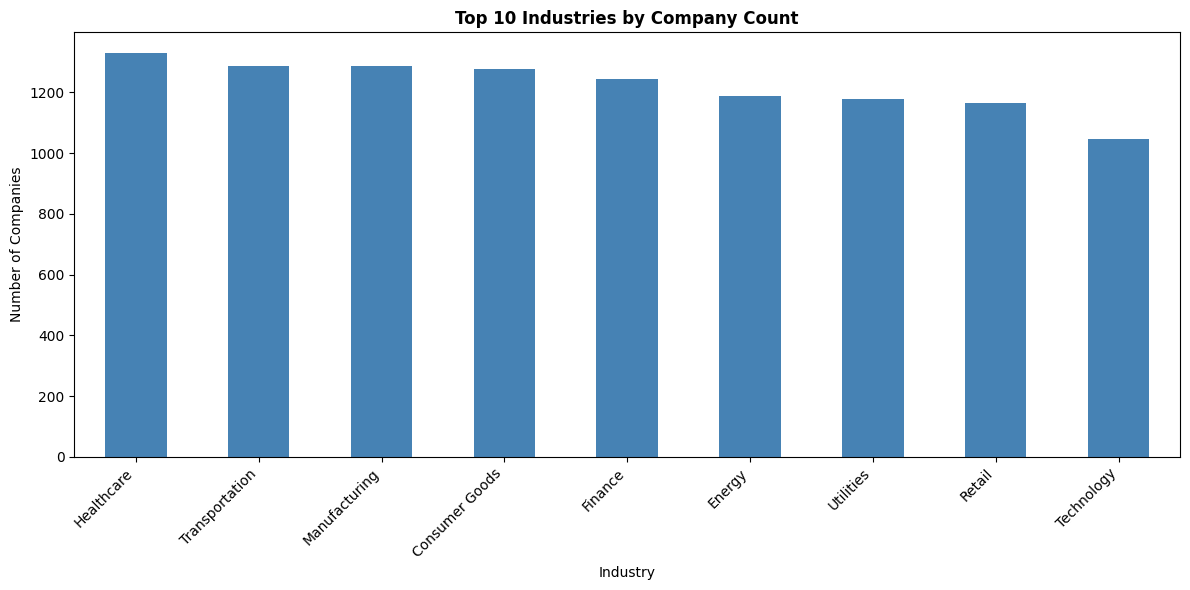

In [19]:
industry_counts = df['Industry'].value_counts()
print(f"Number of unique industries: {len(industry_counts)}")
print("\nTop 10 Industries:")
print(industry_counts.head(10))
    
plt.figure(figsize=(12, 6))
industry_counts.head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10 Industries by Company Count', fontweight='bold')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


ESG Performance by Industry (minimum 3 companies):
         Industry  Mean_ESG  Company_Count  ESG_StdDev
2         Finance     64.62           1243       13.69
6      Technology     63.35           1045       14.39
3      Healthcare     57.25           1331       15.23
5          Retail     55.68           1166       15.17
0  Consumer Goods     54.83           1276       15.16
8       Utilities     51.60           1177       14.53
4   Manufacturing     50.46           1287       14.86
1          Energy     49.01           1188       14.91
7  Transportation     46.03           1287       14.88


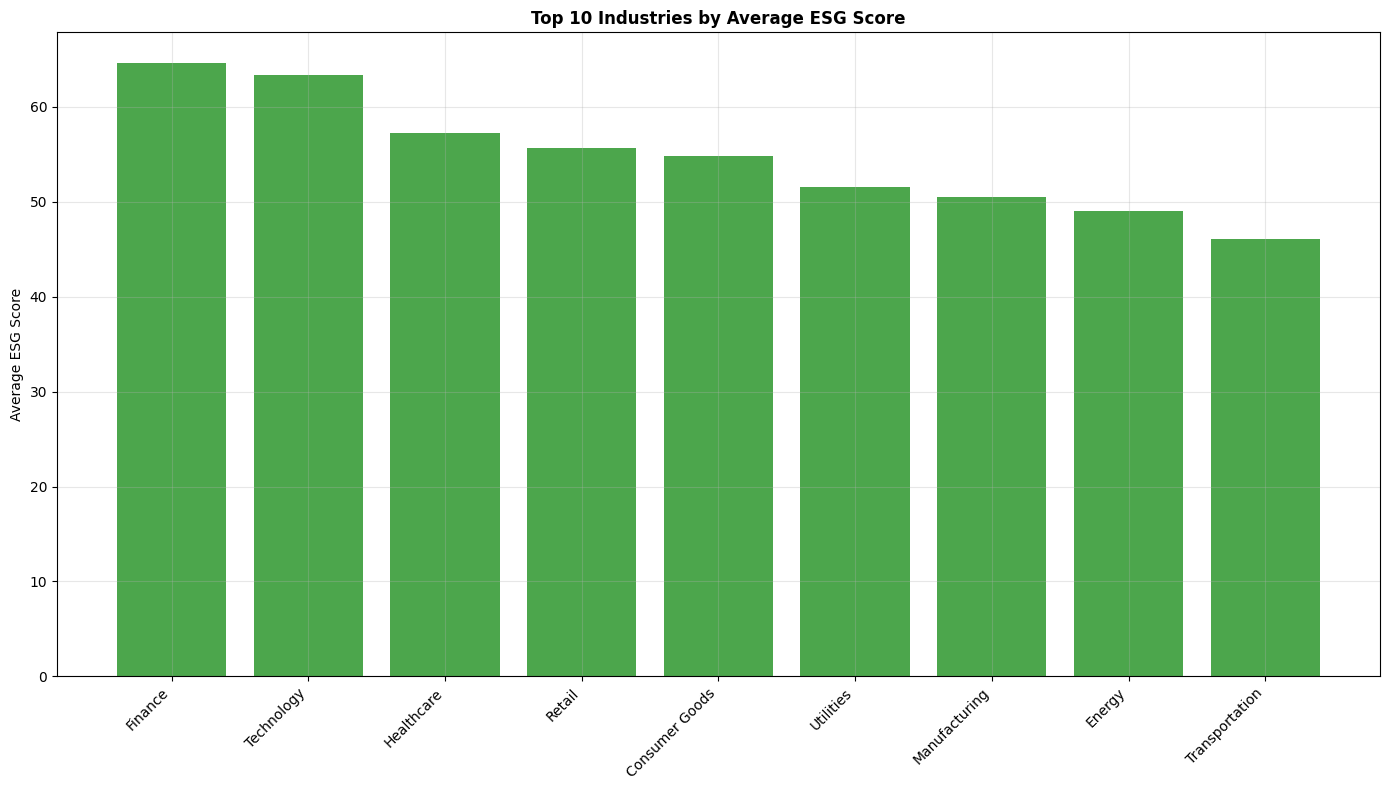

In [20]:
if 'ESG_Overall' in df.columns:
    industry_esg = df.groupby('Industry').agg({
            'ESG_Overall': ['mean', 'count', 'std']
        }).round(2)
        
    industry_esg.columns = ['Mean_ESG', 'Company_Count', 'ESG_StdDev']
    industry_esg = industry_esg.reset_index()
    industry_esg_filtered = industry_esg[industry_esg['Company_Count'] >= 3]
    industry_esg_filtered = industry_esg_filtered.sort_values('Mean_ESG', ascending=False)
        
    print("\nESG Performance by Industry (minimum 3 companies):")
    print(industry_esg_filtered.head(10))
        
    plt.figure(figsize=(14, 8))
    top_industries = industry_esg_filtered.head(10)
    plt.bar(range(len(top_industries)), top_industries['Mean_ESG'], color='green', alpha=0.7)
    plt.xticks(range(len(top_industries)), top_industries['Industry'], rotation=45, ha='right')
    plt.title('Top 10 Industries by Average ESG Score', fontweight='bold')
    plt.ylabel('Average ESG Score')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

FINANCE (64.62) leads with the highest ESG scores, which makes sense given:
- Intense regulatory scrutiny post-2008 financial crisis
- Growing focus on sustainable finance and ESG investing
- Direct stakeholder pressure from institutional investors
- Lower physical environmental impact compared to industrial sectors

TECHNOLOGY (63.35) ranks second, reflecting:
- High public visibility and brand reputation concerns
- Workforce expectations for progressive values
- Capital access advantages from ESG-focused investors
- Generally lower direct environmental impact (though data centers are energy-intensive)

HEALTHCARE (57.25) occupies the middle ground:
- Balances social benefits (health outcomes) with environmental challenges (pharmaceutical waste)
- Strong social scores but moderate environmental performance
- Patient safety and access issues drive governance focus

RETAIL (55.68) and CONSUMER GOODS (54.83) cluster together:
- Direct consumer pressure for sustainable practices
- Supply chain complexity creates ESG challenges
- Brand reputation directly tied to ESG performance

UTILITIES (51.60) shows surprisingly modest scores despite essential services:
- Traditional reliance on fossil fuels drags down environmental scores
- Slow transition to renewable energy sources
- Regulatory constraints limit agility in ESG improvements

MANUFACTURING (50.46) reflects inherent challenges:
- High carbon emissions and resource consumption
- Complex global supply chains
- Industrial processes difficult to make environmentally friendly quickly

ENERGY (49.01) near the bottom is expected:
- Fossil fuel industry faces fundamental ESG headwinds
- Climate change concerns directly impact business model
- Stranded asset risks from energy transition

TRANSPORTATION (46.03) ranks lowest:
- High carbon emissions from logistics and shipping
- Infrastructure-heavy with long asset lifecycles
- Difficult to rapidly decarbonize operations

KEY INSIGHTS:
- Service vs. Industrial Divide: Service-oriented industries (Finance, Technology) significantly outperform industrial sectors (Energy, Transportation, Manufacturing)
- Stakeholder Pressure Effect: Industries with direct consumer or investor interface show higher ESG scores
- Transition Challenge: Traditional heavy industries face structural challenges in ESG transformation
- Consistent Variation: Standard deviations around 14-15 across industries suggest similar internal variation regardless of sector
- Regulatory Impact: Highly regulated industries (Finance, Healthcare) tend toward better ESG performance

Number of unique regions: 7

Regional Distribution:
Region
Asia             1672
Oceania          1661
Middle East      1617
Europe           1540
North America    1540
Latin America    1507
Africa           1463
Name: count, dtype: int64


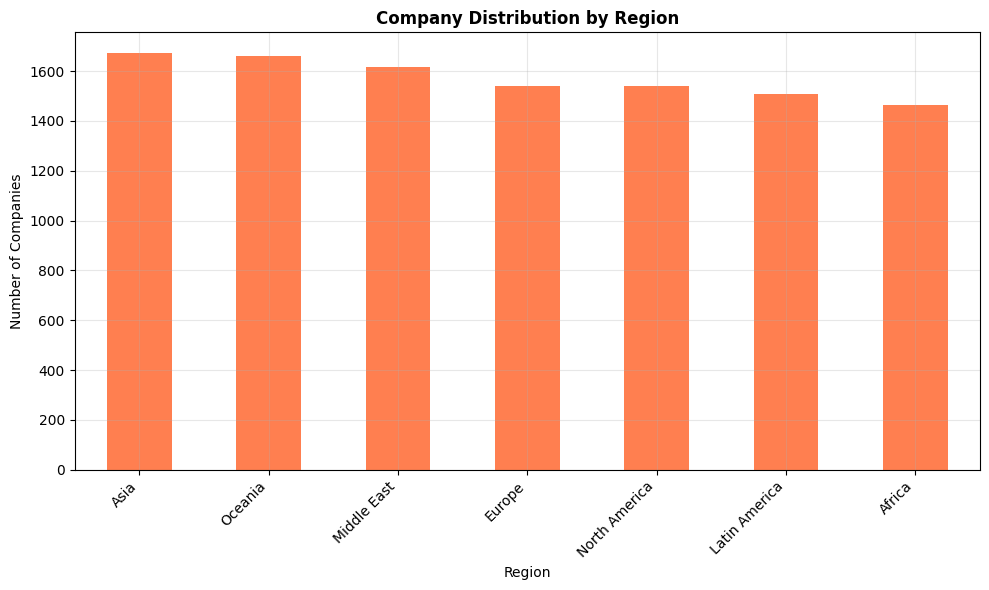

In [21]:
region_counts = df['Region'].value_counts()
print(f"Number of unique regions: {len(region_counts)}")
print("\nRegional Distribution:")
print(region_counts)
    
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='coral')
plt.title('Company Distribution by Region', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [22]:
if 'ESG_Overall' in df.columns:
    region_esg = df.groupby('Region').agg({
            'ESG_Overall': ['mean', 'count', 'std']
        }).round(2)
        
    region_esg.columns = ['Mean_ESG', 'Company_Count', 'ESG_StdDev']
    region_esg = region_esg.reset_index().sort_values('Mean_ESG', ascending=False)
        
    print("\nESG Performance by Region:")
    print(region_esg)


ESG Performance by Region:
          Region  Mean_ESG  Company_Count  ESG_StdDev
2         Europe     67.87           1540       13.19
6        Oceania     62.44           1661       13.24
5  North America     61.22           1540       12.27
1           Asia     51.90           1672       13.52
3  Latin America     50.52           1507       14.10
0         Africa     44.51           1463       12.45
4    Middle East     43.44           1617       14.26


EUROPE (67.87) dominates ESG performance, which aligns with:
- Stringent EU regulations (CSRD, Taxonomy, SFDR)
- Strong environmental activism and public pressure
- Long-term sustainability focus in business culture
- Carbon pricing mechanisms and green finance initiatives
- Stakeholder capitalism model over shareholder primacy

OCEANIA (62.44) ranks second, likely driven by:
- Australia and New Zealand's progressive environmental policies
- Strong governance frameworks and transparency requirements
- Public awareness of climate change impacts (wildfires, coral bleaching)
- Resource-dependent economies investing in sustainability

NORTH AMERICA (61.22) shows solid performance reflecting:
- Mixed regulatory landscape (California leadership, federal variation)
- Strong investor and consumer ESG demands
- Corporate leadership in voluntary ESG adoption
- Technology sector concentration boosting scores

ASIA (51.90) represents a complex middle position:
- Huge variation within region (Japan/South Korea vs. developing nations)
- Rapid industrialization creating environmental challenges
- Growing ESG awareness but implementation lag
- Manufacturing-heavy economies impacting environmental scores

LATIN AMERICA (50.52) shows modest performance:
- Natural resource extraction economies face ESG headwinds
- Growing ESG awareness but capacity constraints
- Political instability affecting governance scores
- Environmental challenges from deforestation and mining

AFRICA's challenges:
- Resource-focused economies with high environmental impact
- Governance challenges affecting overall scores
- Limited regulatory frameworks for ESG
- Development priorities competing with sustainability goals

MIDDLE EAST patterns:
- Oil-dependent economies face structural ESG headwinds
- Traditional governance structures
- Climate challenges (water scarcity, extreme heat)
- Growing recognition of need for economic diversification

KEY INSIGHTS:
- Regulatory Correlation: Regions with stronger ESG regulations (Europe) show highest performance
- Development Stage Impact: More developed regions generally outperform developing ones, suggesting ESG as a "luxury good" in economic development
- Resource Curse Effect: Resource-rich regions (Middle East, parts of Africa/Latin America) show lower ESG scores
- Cultural Alignment: European stakeholder capitalism model vs. other regions' approaches
- Consistent Variation: Standard deviations around 12-14 across regions suggest similar company-level variation regardless of regional averages
- 24-Point Spread: The gap between Europe (67.87) and Middle East (43.44) is substantial, indicating geography as a major ESG determinant

ESG components available: ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']

ESG Components Correlation Matrix:
                   ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance
ESG_Overall              1.000              0.568       0.662           0.671
ESG_Environmental        0.568              1.000       0.025          -0.010
ESG_Social               0.662              0.025       1.000           0.298
ESG_Governance           0.671             -0.010       0.298           1.000


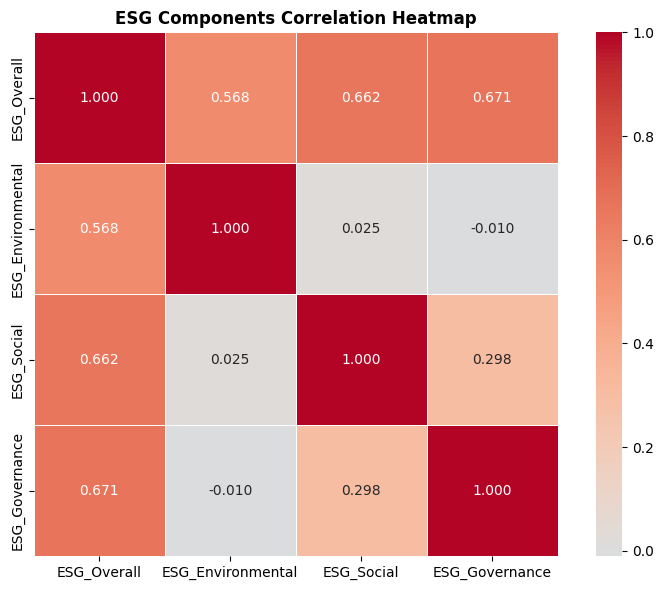

In [23]:
esg_columns = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']
esg_existing = [col for col in esg_columns if col in df.columns]
    
if len(esg_existing) > 1:
    print(f"ESG components available: {esg_existing}")
    df_esg_clean = df[esg_existing].dropna()
        
    if len(df_esg_clean) > 0:
        esg_corr = df_esg_clean.corr()
        print("\nESG Components Correlation Matrix:")
        print(esg_corr.round(3))
            
        plt.figure(figsize=(8, 6))
        sns.heatmap(esg_corr, annot=True, cmap='coolwarm', center=0, 
                       square=True, linewidths=0.5, fmt='.3f')
        plt.title('ESG Components Correlation Heatmap', fontweight='bold')
        plt.tight_layout()
        plt.show()

ESG OVERALL WITH GOVERNANCE (0.671) AND SOCIAL (0.662):
- Governance and Social pillars are the primary drivers of overall ESG scores
- This suggests companies excel at ESG through strong internal management and stakeholder relations
- Governance correlation is slightly stronger, indicating board effectiveness and transparency are crucial

SOCIAL-GOVERNANCE MODERATE CORRELATION (0.298):
- Some overlap between social responsibility and governance quality
- Companies with better stakeholder management tend to have better governance structures.
But still distinct enough to be separate pillars

ENVIRONMENTAL VS. OTHER PILLARS (0.025 with Social, -0.010 with Governance):
- Environmental performance is essentially uncorrelated with Social and Governance
- This is counterintuitive but revealing - companies can have strong governance and social programs while still having poor environmental performance
- Suggests environmental improvements require different capabilities than social/governance initiatives

In [24]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
        
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.6:
                strong_correlations.append({
                        'Variable_1': correlation_matrix.columns[i],
                        'Variable_2': correlation_matrix.columns[j],
                        'Correlation': round(corr_val, 3)
                    })
        
    if strong_correlations:
        print(f"\nStrong Correlations (|r| > 0.6):")
        strong_corr_df = pd.DataFrame(strong_correlations)
        print(strong_corr_df.sort_values('Correlation', key=abs, ascending=False))


Strong Correlations (|r| > 0.6):
        Variable_1         Variable_2  Correlation
4  CarbonEmissions  EnergyConsumption        0.997
5       WaterUsage  EnergyConsumption        0.975
3  CarbonEmissions         WaterUsage        0.969
0          Revenue          MarketCap        0.837
2      ESG_Overall     ESG_Governance        0.671
1      ESG_Overall         ESG_Social        0.662


In [40]:
insights = []
    
total_companies = len(df)
insights.append(f" Dataset contains {total_companies:,} companies")
    
if 'Industry' in df.columns:
    top_industry = df['Industry'].value_counts().index[0]
    top_industry_count = df['Industry'].value_counts().iloc[0]
    insights.append(f" Most represented industry: {top_industry} ({top_industry_count} companies)")
        
    if 'ESG_Overall' in df.columns:
        industry_esg_avg = df.groupby('Industry')['ESG_Overall'].mean()
        best_esg_industry = industry_esg_avg.idxmax()
        best_esg_score = industry_esg_avg.max()
        insights.append(f" Best ESG performance: {best_esg_industry} (avg: {best_esg_score:.2f})")
    
if 'Region' in df.columns:
    top_region = df['Region'].value_counts().index[0]
    top_region_count = df['Region'].value_counts().iloc[0]
    insights.append(f" Most represented region: {top_region} ({top_region_count} companies)")
    
if 'ESG_Overall' in df.columns:
    avg_esg = df['ESG_Overall'].mean()
    median_esg = df['ESG_Overall'].median()
    insights.append(f" ESG Overall - Mean: {avg_esg:.2f}, Median: {median_esg:.2f}")
        
    high_esg = (df['ESG_Overall'] >= 80).sum()
    low_esg = (df['ESG_Overall'] < 60).sum()
    insights.append(f" ESG Distribution - High performers (≥80): {high_esg}, Low performers (<60): {low_esg}")
    
if 'Year' in df.columns:
    year_range = f"{df['Year'].min()}-{df['Year'].max()}"
    insights.append(f" Time period: {year_range}")
    
for i, insight in enumerate(insights, 1):
    print(f"{i:2d}. {insight}")

 1.  Dataset contains 11,000 companies
 2.  Most represented industry: Healthcare (1331 companies)
 3.  Best ESG performance: Finance (avg: 64.62)
 4.  Most represented region: Asia (1672 companies)
 5.  ESG Overall - Mean: 54.62, Median: 54.60
 6.  ESG Distribution - High performers (≥80): 578, Low performers (<60): 6831
 7.  Time period: 2015-2025


In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
def prepare_profit_margin_model(df):
  
    df_model = df.copy()
    
    env_cols = ['CarbonEmissions', 'WaterUsage', 'EnergyConsumption']
    scaler = StandardScaler()
    env_scaled = scaler.fit_transform(df_model[env_cols])
    df_model['Environmental_Impact_Index'] = np.mean(env_scaled, axis=1)
    
    rev_scaled = StandardScaler().fit_transform(df_model[['Revenue']])
    cap_scaled = StandardScaler().fit_transform(df_model[['MarketCap']])
    df_model['Business_Scale'] = (rev_scaled.flatten() + cap_scaled.flatten()) / 2
    
    esg_cols = ['ESG_Environmental', 'ESG_Social', 'ESG_Governance']
    df_model['ESG_Balance'] = 1 / (df_model[esg_cols].std(axis=1) + 0.01)
    
    df_model['Carbon_per_Revenue'] = df_model['CarbonEmissions'] / (df_model['Revenue'] + 1)
    
    le_industry = LabelEncoder()
    le_region = LabelEncoder()
    df_model['Industry_Encoded'] = le_industry.fit_transform(df_model['Industry'])
    df_model['Region_Encoded'] = le_region.fit_transform(df_model['Region'])
    
    return df_model, le_industry, le_region

In [131]:
def train_profit_models(df):
    
    df_model, le_industry, le_region = prepare_profit_margin_model(df)
    
    feature_cols = [
        'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
        'Environmental_Impact_Index', 'Business_Scale', 'ESG_Balance', 'Carbon_per_Revenue',
        'Revenue', 'MarketCap', 'GrowthRate',
        'Industry_Encoded', 'Region_Encoded', 'Year'
    ]
    
    X = df_model[feature_cols].fillna(df_model[feature_cols].mean())
    y = df_model['ProfitMargin']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }
    
    results = {}
    
    print(" PROFIT MARGIN PREDICTION RESULTS")
    
    for name, model in models.items():
        if 'Regression' in name:
            X_train_use, X_test_use = X_train_scaled, X_test_scaled
        else:
            X_train_use, X_test_use = X_train, X_test
        
        model.fit(X_train_use, y_train)
        
        y_pred = model.predict(X_test_use)
        
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        

        within_2pct = np.mean(np.abs(y_test - y_pred) <= 2.0) * 100
        within_5pct = np.mean(np.abs(y_test - y_pred) <= 5.0) * 100
        mape = np.mean(np.abs((y_test - y_pred) / (y_test + 0.001))) * 100
        
        cv_scores = cross_val_score(model, X_train_use, y_train, cv=5, scoring='r2')
        
        results[name] = {
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'CV_R²_mean': cv_scores.mean(),
            'CV_R²_std': cv_scores.std(),
            'Within_2pct': within_2pct,
            'Within_5pct': within_5pct,
            'MAPE': mape,
            'model': model,
            'predictions': y_pred,
            'scaler': scaler if 'Regression' in name else None,
            'X_test': X_test_use,
            'y_test': y_test
        }
        
        print(f" {name}")
        print(f"   RMSE: {rmse:.3f}")
        print(f"   MAE:  {mae:.3f}")
        print(f"   R²:   {r2:.3f}")
        print(f"   Accuracy within ±2%: {within_2pct:.1f}%")
        print(f"   Accuracy within ±5%: {within_5pct:.1f}%")
        print(f"   MAPE: {mape:.1f}%")
        print(f"   CV R² (mean ± std): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
        print()
    
    best_tree_model = results['Gradient Boosting']['model']
    
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': best_tree_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("TOP 10 FEATURE IMPORTANCES (Gradient Boosting)")
    print(feature_importance.head(10))
    
    return results, feature_importance, X_test, y_test, feature_cols

In [132]:
def analyze_esg_profit_relationship(df, results):
    
    df_analysis = df.copy()
    
    esg_profit_corr = df_analysis[['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 
                                  'ESG_Governance', 'ProfitMargin']].corr()['ProfitMargin']
    
    print("\n=== ESG-PROFIT MARGIN CORRELATIONS ===")
    for esg_col in ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']:
        corr = esg_profit_corr[esg_col]
        print(f"{esg_col:20}: {corr:+.3f}")
    
    df_analysis['ESG_Quartile'] = pd.qcut(df_analysis['ESG_Overall'], 4, 
                                         labels=['Bottom 25%', 'Q2', 'Q3', 'Top 25%'])
    
    quartile_profits = df_analysis.groupby('ESG_Quartile')['ProfitMargin'].agg(['mean', 'std', 'count'])
    
    print("\n=== PROFIT MARGIN BY ESG QUARTILE ===")
    print(quartile_profits)
    
    top_esg = df_analysis.nlargest(100, 'ESG_Overall')['ProfitMargin'].mean()
    bottom_esg = df_analysis.nsmallest(100, 'ESG_Overall')['ProfitMargin'].mean()
    
    print(f"\n=== ESG PERFORMANCE COMPARISON ===")
    print(f"Top 100 ESG companies avg profit margin:    {top_esg:.2f}%")
    print(f"Bottom 100 ESG companies avg profit margin: {bottom_esg:.2f}%")
    print(f"Difference:                                 {top_esg - bottom_esg:+.2f}%")
    
    return quartile_profits

In [133]:
comparison = pd.DataFrame({
        'Model': list(results.keys()),
        'RMSE': [results[model]['RMSE'] for model in results.keys()],
        'R²': [results[model]['R²'] for model in results.keys()],
        'CV_R²': [results[model]['CV_R²_mean'] for model in results.keys()]
    }).sort_values('R²', ascending=False)
    
print(comparison)

               Model      RMSE        R²     CV_R²
2      Random Forest  5.126929  0.669831  0.650206
3  Gradient Boosting  6.455577  0.476530  0.477945
0  Linear Regression  8.515718  0.089114  0.147231
1   Ridge Regression  8.516313  0.088987  0.147065


In [134]:
def evaluate_model_performance(results):
    
    comparison = pd.DataFrame({
        'Model': list(results.keys()),
        'RMSE': [results[model]['RMSE'] for model in results.keys()],
        'R²': [results[model]['R²'] for model in results.keys()],
        'CV_R²': [results[model]['CV_R²_mean'] for model in results.keys()]
    }).sort_values('R²', ascending=False)
    
    print(comparison)
    
    best_model_name = comparison.iloc[0]['Model']
    best_model_r2 = comparison.iloc[0]['R²']
    
    print(f"\n BEST MODEL: {best_model_name}")
    print(f"   R² Score: {best_model_r2:.3f}")
    
    if best_model_r2 > 0.3:
        interpretation = "Good predictive power"
    elif best_model_r2 > 0.15:
        interpretation = "Moderate predictive power"
    else:
        interpretation = "Limited predictive power"
    
    print(f"   Interpretation: {interpretation}")
    
    return best_model_name, comparison

In [135]:
def predict_profit_margin(new_data, trained_results, best_model_name, feature_cols):
    
    best_result = trained_results[best_model_name]
    model = best_result['model']
    scaler = best_result.get('scaler', None)
    
    new_data_prep, _, _ = prepare_profit_margin_model(new_data)
    
    X_new = new_data_prep[feature_cols].fillna(new_data_prep[feature_cols].mean())
    
    if scaler is not None:
        X_new_scaled = scaler.transform(X_new)
        predictions = model.predict(X_new_scaled)
    else:
        predictions = model.predict(X_new)
    
    results_df = pd.DataFrame({
        'CompanyName': new_data['CompanyName'] if 'CompanyName' in new_data.columns else range(len(new_data)),
        'ESG_Overall': new_data['ESG_Overall'],
        'Actual_ProfitMargin': new_data['ProfitMargin'] if 'ProfitMargin' in new_data.columns else np.nan,
        'Predicted_ProfitMargin': predictions,
        'Confidence': 'High' if best_result['R²'] > 0.3 else 'Medium' if best_result['R²'] > 0.15 else 'Low'
    })
    
    if 'ProfitMargin' in new_data.columns:
        results_df['Prediction_Error'] = results_df['Actual_ProfitMargin'] - results_df['Predicted_ProfitMargin']
        results_df['Accurate_Within_2pct'] = np.abs(results_df['Prediction_Error']) <= 2.0
    
    return results_df


In [136]:
def show_prediction_examples(df, results, best_model_name, feature_cols):
    
    print("\n=== PREDICTION EXAMPLES ===")
    
    sample_companies = df.sample(10, random_state=42)
    
    predictions = predict_profit_margin(sample_companies, results, best_model_name, feature_cols)
    
    print(predictions[['CompanyName', 'ESG_Overall', 'Actual_ProfitMargin', 
                      'Predicted_ProfitMargin', 'Prediction_Error']].round(2))
    
    accurate_predictions = predictions['Accurate_Within_2pct'].sum()
    total_predictions = len(predictions)
    
    print(f"\nSample Accuracy: {accurate_predictions}/{total_predictions} ({accurate_predictions/total_predictions*100:.1f}%) within ±2%")
    
    return predictions

In [137]:
results, feature_importance, X_test, y_test, feature_cols = train_profit_models(df)
    
quartile_analysis = analyze_esg_profit_relationship(df, results)
    
best_model, comparison = evaluate_model_performance(results)
    
predictions_sample = show_prediction_examples(df, results, best_model, feature_cols)
    
print(f"\n Analysis Complete!")
print(f" Dataset size: {len(df):,} companies")
print(f" Target: Profit Margin (Range: {df['ProfitMargin'].min():.1f}% to {df['ProfitMargin'].max():.1f}%)")
print(f" Best Model: {best_model}")

 PROFIT MARGIN PREDICTION RESULTS
 Linear Regression
   RMSE: 8.516
   MAE:  6.227
   R²:   0.089
   Accuracy within ±2%: 22.7%
   Accuracy within ±5%: 51.7%
   MAPE: 540.1%
   CV R² (mean ± std): 0.147 ± 0.016

 Ridge Regression
   RMSE: 8.516
   MAE:  6.227
   R²:   0.089
   Accuracy within ±2%: 22.6%
   Accuracy within ±5%: 52.0%
   MAPE: 540.2%
   CV R² (mean ± std): 0.147 ± 0.016

 Random Forest
   RMSE: 5.127
   MAE:  3.148
   R²:   0.670
   Accuracy within ±2%: 54.1%
   Accuracy within ±5%: 82.6%
   MAPE: 85.1%
   CV R² (mean ± std): 0.650 ± 0.022

 Gradient Boosting
   RMSE: 6.456
   MAE:  4.174
   R²:   0.477
   Accuracy within ±2%: 42.3%
   Accuracy within ±5%: 74.2%
   MAPE: 256.5%
   CV R² (mean ± std): 0.478 ± 0.033

TOP 10 FEATURE IMPORTANCES (Gradient Boosting)
                       Feature  Importance
9                    MarketCap    0.588087
8                      Revenue    0.182039
4   Environmental_Impact_Index    0.062167
11            Industry_Encoded    0.05670

In [138]:
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8]
}

print(f"   Testing {len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features'])} combinations...")


   Testing 324 combinations...


In [139]:
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 15, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [140]:
best_rf = grid_search.best_estimator_
best_pred = best_rf.predict(X_test)

In [141]:
optimized_r2 = r2_score(y_test, best_pred)
optimized_mae = mean_absolute_error(y_test, best_pred)
optimized_rmse = np.sqrt(mean_squared_error(y_test, best_pred))
optimized_within_2 = np.mean(np.abs(y_test - best_pred) <= 2.0) * 100
optimized_within_5 = np.mean(np.abs(y_test - best_pred) <= 5.0) * 100

print(f"   R²: {optimized_r2:.3f}")
print(f"   RMSE: {optimized_rmse:.3f}")
print(f"   MAE: {optimized_mae:.3f}")
print(f"   Accuracy ±2%: {optimized_within_2:.1f}%")
print(f"   Accuracy ±5%: {optimized_within_5:.1f}%")

print(f"\n BEST HYPERPARAMETERS:")
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")

   R²: 0.720
   RMSE: 4.724
   MAE: 3.009
   Accuracy ±2%: 54.6%
   Accuracy ±5%: 83.5%

 BEST HYPERPARAMETERS:
   max_depth: None
   max_features: sqrt
   min_samples_leaf: 1
   min_samples_split: 2
   n_estimators: 300


In [143]:
print(f"\n TOP 10 FEATURE IMPORTANCES (OPTIMIZED MODEL):")
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10))


 TOP 10 FEATURE IMPORTANCES (OPTIMIZED MODEL):
                       Feature  Importance
9                    MarketCap    0.227918
7           Carbon_per_Revenue    0.102778
8                      Revenue    0.095444
5               Business_Scale    0.095119
4   Environmental_Impact_Index    0.075458
1            ESG_Environmental    0.056839
2                   ESG_Social    0.055847
3               ESG_Governance    0.055288
6                  ESG_Balance    0.052187
11            Industry_Encoded    0.051145
